# Hotel Bookings Exploratory Data Analysis

## Objective
We are provided with a hotel bookings dataset. 

Our main objective is perform EDA on the given dataset and draw useful conclusions about general trends in hotel bookings and how factors governing hotel bookings interact with each other.

## Dataset
We are given a hotel bookings dataset. This dataset contains booking information for a city hotel and a resort hotel. It contains the following features.

```
- hotel: Name of hotel ( City or Resort)
- is_canceled: Whether the booking is canceled or not (0 for no canceled and 1 for canceled)
- lead_time: time (in days) between booking transaction and actual arrival.
- arrival_date_year: Year of arrival
- arrival_date_month: month of arrival
- arrival_date_week_number: week number of arrival date.
- arrival_date_day_of_month: Day of month of arrival date
- stays_in_weekend_nights: No. of weekend nights spent in a hotel
- stays_in_week_nights: No. of weeknights spent in a hotel
- adults: No. of adults in single booking record.
- children: No. of children in single booking record.
- babies: No. of babies in single booking record. 
- meal: Type of meal chosen 
- country: Country of origin of customers (as mentioned by them)
- market_segment: What segment via booking was made and for what purpose.
- distribution_channel: Via which medium booking was made.
- is_repeated_guest: Whether the customer has made any booking before(0 for No and 1 for 
                     Yes)
- previous_cancellations: No. of previous canceled bookings.
- previous_bookings_not_canceled: No. of previous non-canceled bookings.
- reserved_room_type: Room type reserved by a customer.
- assigned_room_type: Room type assigned to the customer.
- booking_changes: No. of booking changes done by customers
- deposit_type: Type of deposit at the time of making a booking (No deposit/ Refundable/ No refund)
- agent: Id of agent for booking
- company: Id of the company making a booking
- days_in_waiting_list: No. of days on waiting list.
- customer_type: Type of customer(Transient, Group, etc.)
- adr: Average Daily rate.
- required_car_parking_spaces: No. of car parking asked in booking
- total_of_special_requests: total no. of special request.
- reservation_status: Whether a customer has checked out or canceled,or not showed 
- reservation_status_date: Date of making reservation status.
```

- Total number of rows in data: 119390
- Total number of columns: 32

In [30]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [31]:
df = pd.read_csv("hotel_bookings.csv")

In [32]:
df.shape

(119390, 32)

In [33]:
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [35]:
df.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,103050.000000,6797.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,0.031912,0.087118,0.137097,0.221124,86.693382,189.266735,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,0.175767,0.844336,1.497437,0.652306,110.774548,131.655015,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,62.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,179.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


In [36]:
# Create the copy of the dataframe

df1 = df.copy()

In [37]:
df1.hotel.value_counts()

hotel
City Hotel      79330
Resort Hotel    40060
Name: count, dtype: int64

In [38]:
df1.is_canceled.value_counts(dropna=False)

is_canceled
0    75166
1    44224
Name: count, dtype: int64

In [39]:
df1.arrival_date_year.value_counts(dropna=False)

arrival_date_year
2016    56707
2017    40687
2015    21996
Name: count, dtype: int64

In [40]:
df1.meal.value_counts(dropna=False)

meal
BB           92310
HB           14463
SC           10650
Undefined     1169
FB             798
Name: count, dtype: int64

In [41]:
df1.market_segment.value_counts(dropna=False)


market_segment
Online TA        56477
Offline TA/TO    24219
Groups           19811
Direct           12606
Corporate         5295
Complementary      743
Aviation           237
Undefined            2
Name: count, dtype: int64

In [42]:
df1.distribution_channel.value_counts(dropna=False)


distribution_channel
TA/TO        97870
Direct       14645
Corporate     6677
GDS            193
Undefined        5
Name: count, dtype: int64

In [43]:
df1.children.value_counts(dropna=False)

children
0.0     110796
1.0       4861
2.0       3652
3.0         76
NaN          4
10.0         1
Name: count, dtype: int64

### <b> Cleaning data </b> 

Cleaning data is crucial step before EDA as it will remove the ambigous data that can affect the outcome of EDA.

While cleaning data we will perform following steps: \
1) Remove duplicate rows  \
2) Handling missing values.  \
3) Convert columns to appropriate datatypes.  \
4) Adding important columns

### 1) Remove duplicate rows

In [44]:
df1[df1.duplicated()].shape

(31994, 32)

In [45]:
# Dropping duplicate values
df1.drop_duplicates(inplace = True)

In [46]:
df1.shape

(87396, 32)

### 2) Handling missing values.

In [47]:
df1.isnull().sum().sort_values(ascending = False)[:4]

company     82137
agent       12193
country       452
children        4
dtype: int64

Since, company and agent columns have null values. There may be some cases in which the customer didnt booked hotel through any agent or company.So, null values can be kept and will be replaced by 0.

In [48]:
df1.agent.fillna(0, inplace = True)

In [49]:
df1.isnull().sum().sort_values(ascending = False)[:4]

company     82137
country       452
children        4
agent           0
dtype: int64

In [50]:
df1.company.fillna(0, inplace = True)

In [51]:
df1.isnull().sum().sort_values(ascending = False)[:4]

country     452
children      4
hotel         0
agent         0
dtype: int64

In [52]:
df1.children.value_counts(dropna = False)

children
0.0     79028
1.0      4695
2.0      3593
3.0        75
NaN         4
10.0        1
Name: count, dtype: int64

Nan values can be replaced with 0 values as 0 column is present . So customer might have forgetten to fill the column

In [53]:
df1.children.fillna(0, inplace = True)

In [54]:
df1.children.value_counts(dropna = False)

children
0.0     79032
1.0      4695
2.0      3593
3.0        75
10.0        1
Name: count, dtype: int64

In [55]:
df1.isnull().sum().sort_values(ascending = False)[:4]

country                   452
hotel                       0
previous_cancellations      0
reservation_status          0
dtype: int64

In [56]:
df1.country.value_counts(dropna=False)

country
PRT    27453
GBR    10433
FRA     8837
ESP     7252
DEU     5387
       ...  
MMR        1
BFA        1
CYM        1
MLI        1
KHM        1
Name: count, Length: 178, dtype: int64

In [57]:
df1.country.fillna('others', inplace = True)

In [58]:
df1.isnull().sum().sort_values(ascending = False)

hotel                             0
is_canceled                       0
reservation_status                0
total_of_special_requests         0
required_car_parking_spaces       0
adr                               0
customer_type                     0
days_in_waiting_list              0
company                           0
agent                             0
deposit_type                      0
booking_changes                   0
assigned_room_type                0
reserved_room_type                0
previous_bookings_not_canceled    0
previous_cancellations            0
is_repeated_guest                 0
distribution_channel              0
market_segment                    0
country                           0
meal                              0
babies                            0
children                          0
adults                            0
stays_in_week_nights              0
stays_in_weekend_nights           0
arrival_date_day_of_month         0
arrival_date_week_number    

In [59]:
df1[(df1.adults + df1.babies + df1.children) == 0].shape

(166, 32)

There are some rows where total number of adults,children and babies is zero. So, we will remove such rows.

In [60]:
df1.drop(df1[(df1.adults + df1.babies + df1.children) == 0].index, inplace = True)

In [61]:
df1.shape

(87230, 32)

In [62]:
df1.dtypes

hotel                              object
is_canceled                         int64
lead_time                           int64
arrival_date_year                   int64
arrival_date_month                 object
arrival_date_week_number            int64
arrival_date_day_of_month           int64
stays_in_weekend_nights             int64
stays_in_week_nights                int64
adults                              int64
children                          float64
babies                              int64
meal                               object
country                            object
market_segment                     object
distribution_channel               object
is_repeated_guest                   int64
previous_cancellations              int64
previous_bookings_not_canceled      int64
reserved_room_type                 object
assigned_room_type                 object
booking_changes                     int64
deposit_type                       object
agent                             

### 3.Converting columns to appropriate data types

In [63]:
# Converting datatype of columns 'children', 'company' and 'agent' from float to int.
df1[['children', 'company', 'agent']] = df1[['children', 'company', 'agent']].astype('int64')


In [64]:
# changing datatype of column 'reservation_status_date' to data_type.
df1['reservation_status_date'] = pd.to_datetime(df1['reservation_status_date'], format = '%Y-%m-%d')

### 4. Adding important columns

In [65]:
df1.stays_in_week_nights

0         0
1         0
2         1
3         1
4         2
         ..
119385    5
119386    5
119387    5
119388    5
119389    7
Name: stays_in_week_nights, Length: 87230, dtype: int64

In [66]:
df1.stays_in_weekend_nights

0         0
1         0
2         0
3         0
4         0
         ..
119385    2
119386    2
119387    2
119388    2
119389    2
Name: stays_in_weekend_nights, Length: 87230, dtype: int64

In [67]:
# Adding total staying days in hotels
df1["total_stay"] = df1.stays_in_week_nights + df1.stays_in_weekend_nights

In [68]:
df1.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,total_stay
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,0,0,0,Transient,0.0,0,0,Check-Out,2015-07-01,0
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,0,0,0,Transient,0.0,0,0,Check-Out,2015-07-01,0
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,0,0,0,Transient,75.0,0,0,Check-Out,2015-07-02,1
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,304,0,0,Transient,75.0,0,0,Check-Out,2015-07-02,1
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,240,0,0,Transient,98.0,0,1,Check-Out,2015-07-03,2


In [69]:
# Adding total people num as column, i.e. total people num = num of adults + children + babies
df1["total_people"] = (df1.adults + df1.babies + df1.children)

In [70]:
df1

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,total_stay,total_people
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,0,0,Transient,0.00,0,0,Check-Out,2015-07-01,0,2
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,0,0,Transient,0.00,0,0,Check-Out,2015-07-01,0,2
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,0,0,Transient,75.00,0,0,Check-Out,2015-07-02,1,1
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,0,0,Transient,75.00,0,0,Check-Out,2015-07-02,1,1
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,0,0,Transient,98.00,0,1,Check-Out,2015-07-03,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,0,0,Transient,96.14,0,0,Check-Out,2017-09-06,7,2
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,0,0,Transient,225.43,0,2,Check-Out,2017-09-07,7,3
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,0,0,Transient,157.71,0,4,Check-Out,2017-09-07,7,2
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,0,0,Transient,104.40,0,0,Check-Out,2017-09-07,7,2


## 5.EDA

In [71]:
num_df1 = df1[['lead_time','previous_cancellations','previous_bookings_not_canceled','booking_changes','days_in_waiting_list','adr','required_car_parking_spaces','total_of_special_requests','total_stay','total_people']]

<Axes: >

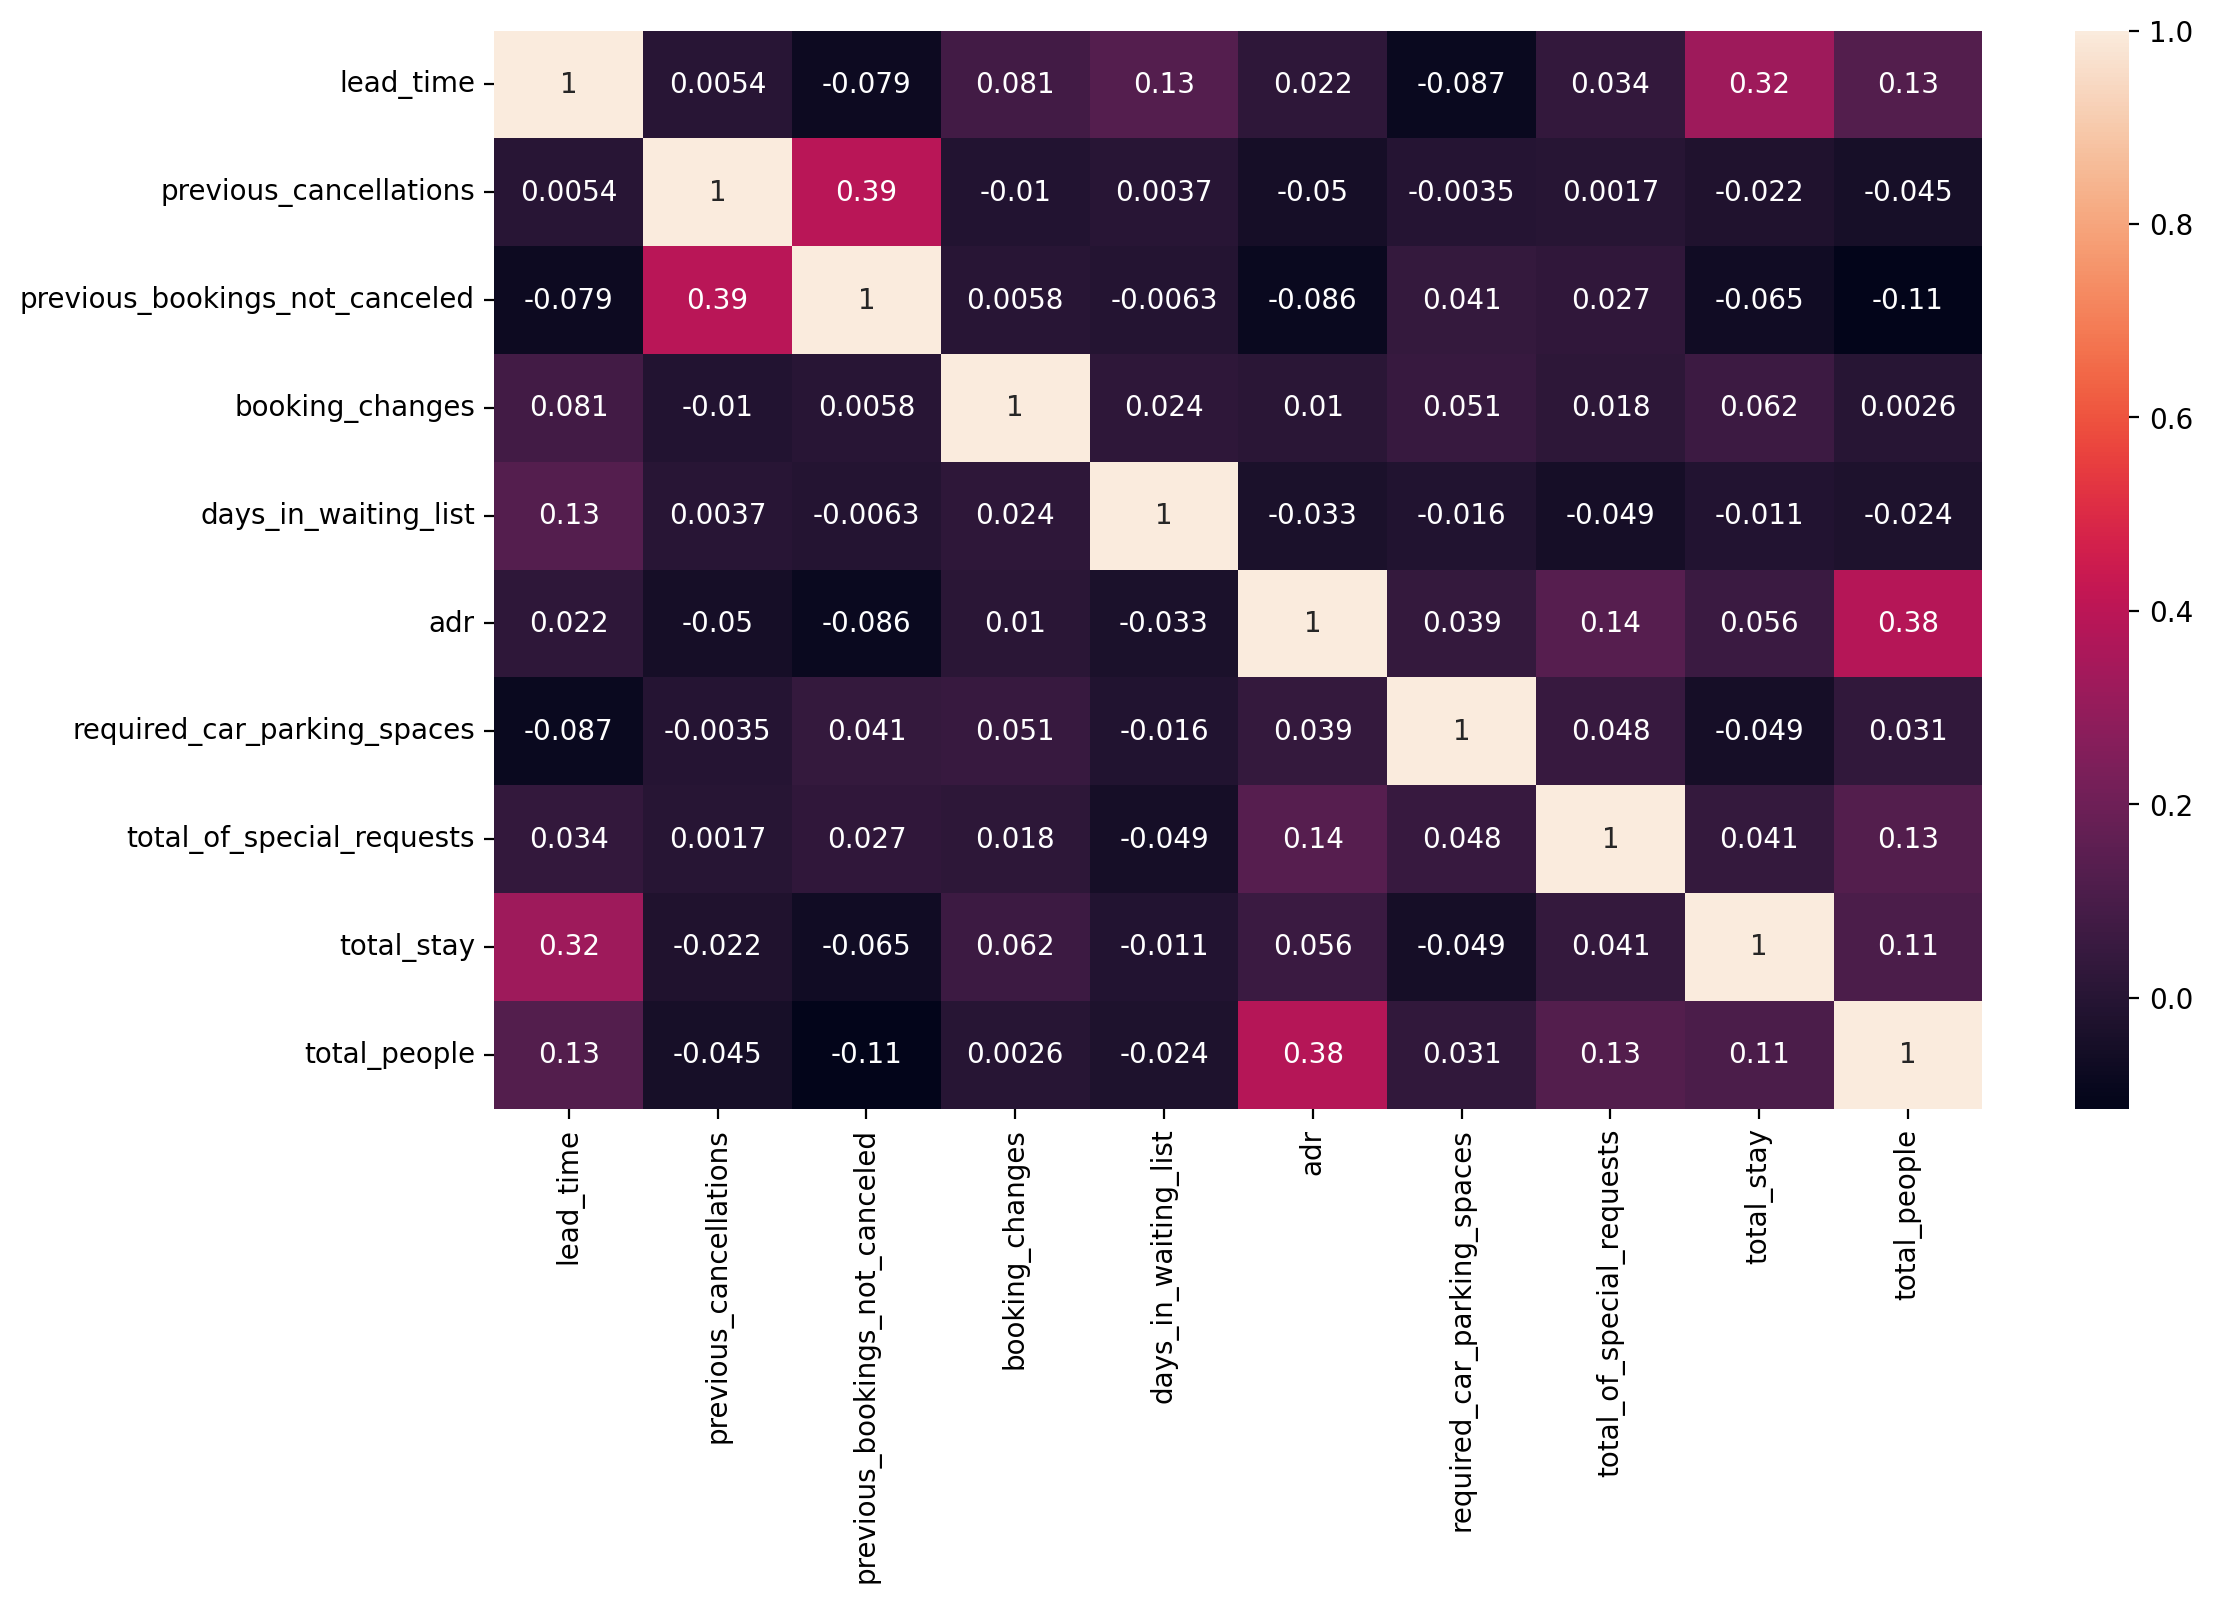

In [72]:
plt.figure(figsize = (12,7), dpi = 200)
sns.heatmap(num_df1.corr(), annot=True)

There is a slight relation between total_people and adr(average daily rate). This makes sense as mor no. of people means more revenue

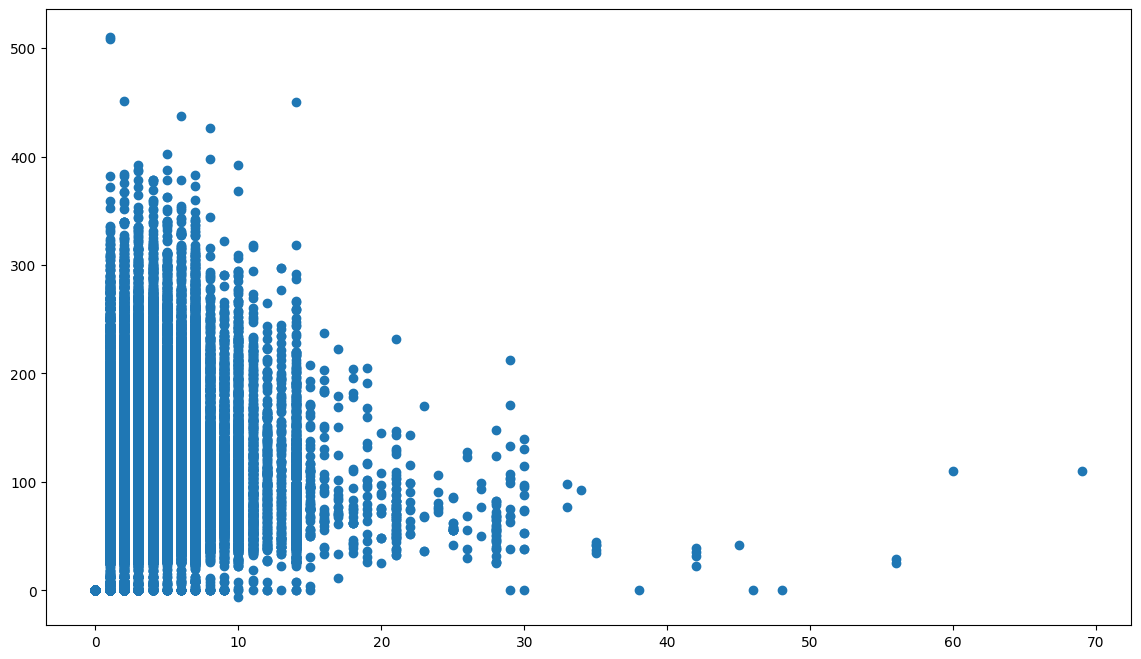

In [107]:
plt.figure(figsize=(14,8),dpi =100)
plt.scatter(df1.total_stay,df1.adr)

Here we can see that there is an outlier. We have to remove it

In [75]:
df1[df1.adr > 5000]

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,total_stay,total_people
48515,City Hotel,1,35,2016,March,13,25,0,1,2,...,0,0,Transient,5400.0,0,0,Canceled,2016-02-19,1,2


In [76]:
df1.drop(df1[df1.adr > 5000].index, inplace= True)

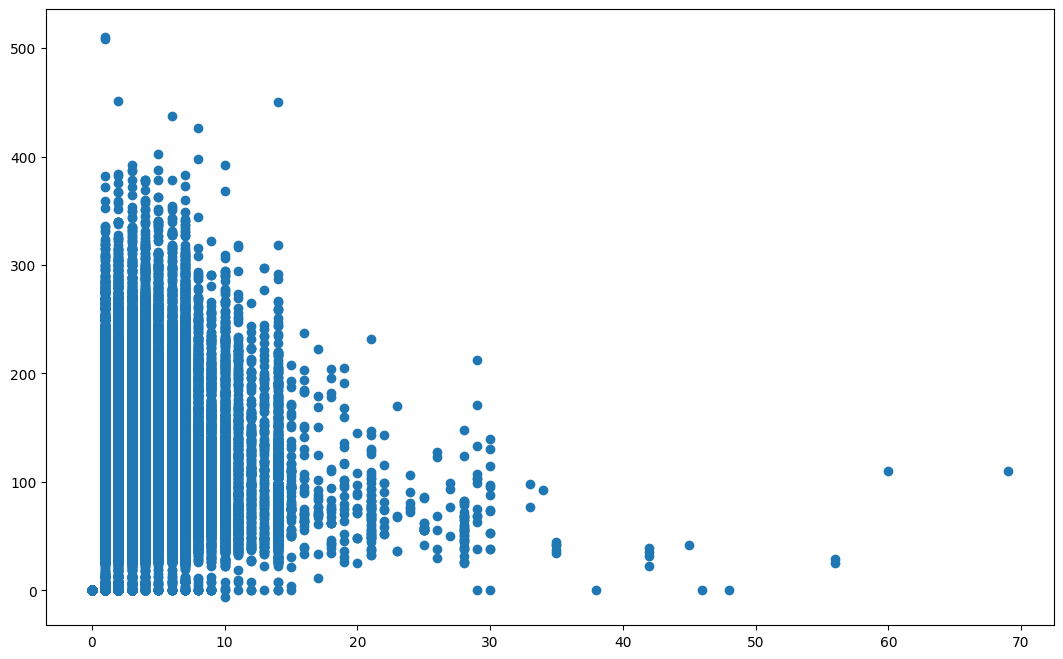

In [109]:
plt.figure(figsize=(13,8),dpi =100)
plt.scatter(df1.total_stay,df1.adr)

From the scatter plot we can see that as length of tottal_stay increases the adr decreases. This means for longer stay, the better deal for customer can be finalised.

Q1 Most no. of bookings by agent

In [86]:
def bar_plot(x,y):
    plt.figure(figsize = (10,6), dpi =100)
    return sns.barplot(x,y)

In [87]:
df1.agent.value_counts()

agent
9      28721
240    13028
0      12141
14      3342
7       3294
       ...  
59         1
451        1
472        1
70         1
449        1
Name: count, Length: 334, dtype: int64

In [92]:
top_agents = pd.DataFrame(df1.agent.value_counts())


In [89]:
top_agents[top_agents.index == 0].index

Index([0], dtype='int64', name='agent')

In [90]:
top_agents.drop(top_agents[top_agents.index == 0].index, inplace = True)
top_agents = top_agents[:10]
top_agents

,count
agent,
9,28721
240,13028
14,3342
7,3294
250,2779
241,1644
28,1493
8,1383
1,1228


In [93]:
df1.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,total_stay,total_people
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,0,0,Transient,0.0,0,0,Check-Out,2015-07-01,0,2
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,0,0,Transient,0.0,0,0,Check-Out,2015-07-01,0,2
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,0,0,Transient,75.0,0,0,Check-Out,2015-07-02,1,1
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,0,0,Transient,75.0,0,0,Check-Out,2015-07-02,1,1
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,0,0,Transient,98.0,0,1,Check-Out,2015-07-03,2,2


In [94]:
top_room  = df1.assigned_room_type.value_counts()
top_room

assigned_room_type
A    46282
D    22419
E     7190
F     3627
G     2495
C     2160
B     1811
H      706
I      353
K      185
L        1
Name: count, dtype: int64

<BarContainer object of 11 artists>

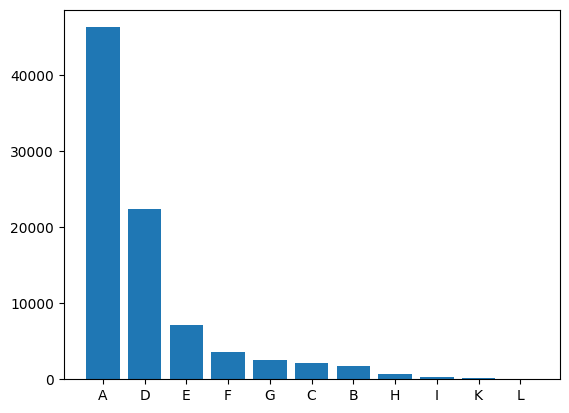

In [96]:
plt.bar(top_room.index,top_room)

Q3) Which meal type isthe  most prefered meal of customers?

In [120]:
meal = df1.meal.value_counts()
meal

meal
BB           67906
SC            9391
HB            9080
Undefined      492
FB             360
Name: count, dtype: int64

<BarContainer object of 5 artists>

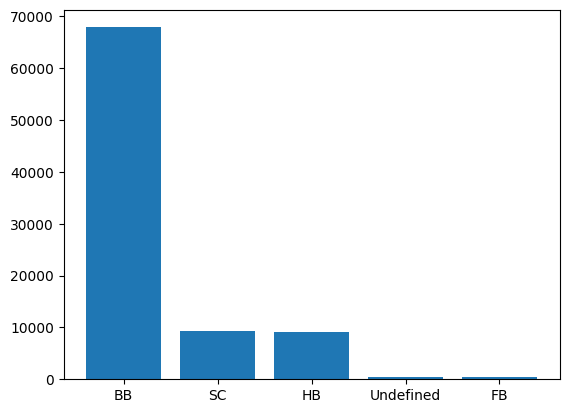

In [122]:
plt.bar(meal.index,meal)

Most preferred meal type is BB (Bed and breakfast).

Q4) What is the  percentage of bookings in each hotel?


In [123]:
perc_bookings  = df1.hotel.value_counts()/len(df1) * 100
perc_bookings

hotel
City Hotel      61.072579
Resort Hotel    38.927421
Name: count, dtype: float64

<BarContainer object of 2 artists>

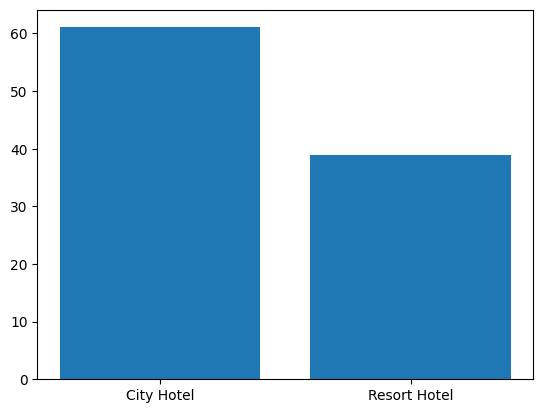

In [124]:
plt.bar(perc_bookings.index,perc_bookings)

Q5) Which is the most common channel for booking hotels?

In [125]:
top_channel = df1.distribution_channel.value_counts()
top_channel

distribution_channel
TA/TO        69027
Direct       12954
Corporate     5062
GDS            181
Undefined        5
Name: count, dtype: int64

<BarContainer object of 5 artists>

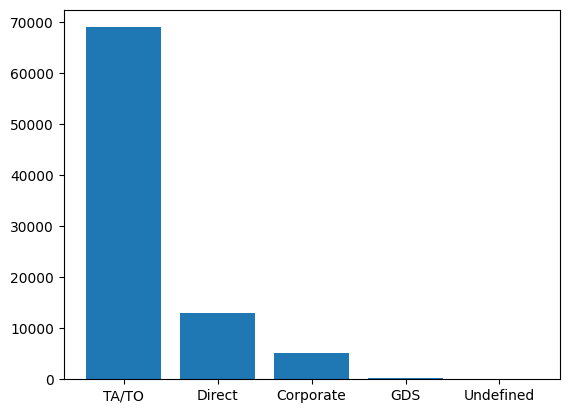

In [126]:
plt.bar(top_channel.index,top_channel)

Q6) Which are the most busy months?

In [127]:
busy_months = df1.arrival_date_month.value_counts()
busy_months

arrival_date_month
August       11242
July         10043
May           8344
April         7900
June          7756
March         7488
October       6921
September     6682
February      6083
December      5112
November      4973
January       4685
Name: count, dtype: int64

<BarContainer object of 12 artists>

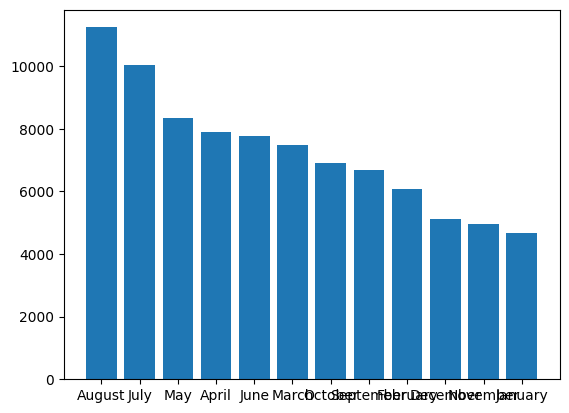

In [128]:

plt.bar(busy_months.index,busy_months)

Q7) From which country most of the guests are comin ?

In [129]:
top_country = df1.country.value_counts()[:10]
top_country

country
PRT    27354
GBR    10424
FRA     8823
ESP     7244
DEU     5385
ITA     3061
IRL     3015
BEL     2081
BRA     1993
NLD     1910
Name: count, dtype: int64

<BarContainer object of 10 artists>

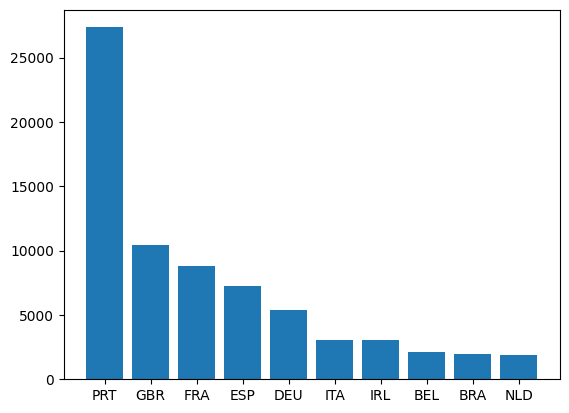

In [130]:
plt.bar(top_country.index,top_country)

Q8) How long do people stay at the hotels?

In [131]:
stay = df1.total_stay.value_counts()[:10]
stay

total_stay
3     17827
1     17168
2     15734
4     13565
7      7520
5      6729
6      3263
10     1072
8      1062
14      859
Name: count, dtype: int64

<BarContainer object of 10 artists>

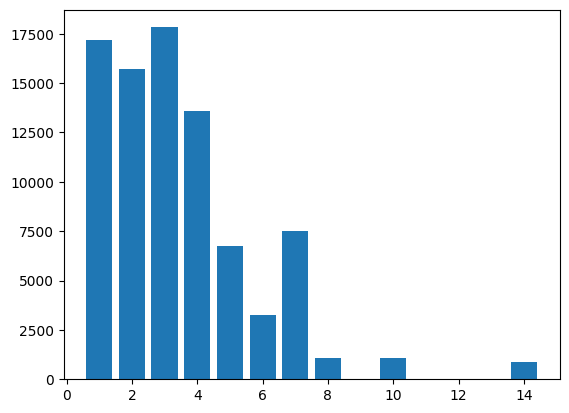

In [132]:
plt.bar(stay.index,stay)

Q9)  Which hotel has higher bookings cancellation rate.

In [148]:
df1.groupby(["hotel","is_canceled"]).count()

lead_time  arrival_date_year  arrival_date_month  \
hotel        is_canceled                                                     
City Hotel   0                37239              37239               37239   
             1                16034              16034               16034   
Resort Hotel 0                25982              25982               25982   
             1                 7974               7974                7974   

                          arrival_date_week_number  arrival_date_day_of_month  \
hotel        is_canceled                                                        
City Hotel   0                               37239                      37239   
             1                               16034                      16034   
Resort Hotel 0                               25982                      25982   
             1                                7974                       7974   

                          stays_in_weekend_nights  stays_in_week_nights  \
hotel        is_canceled                                                  
City Hotel   0                              37239                 37239   
             1                              16034                 16034   
Resort Hotel 0                              25982                 25982   
             1                               7974                  7974   

                          adults  children  babies  ...  company  \
hotel        is_canceled                            ...            
City Hotel   0             37239     37239   37239  ...    37239   
             1             16034     16034   16034  ...    16034   
Resort Hotel 0             25982     25982   25982  ...    25982   
             1              7974      7974    7974  ...     7974   

                          days_in_waiting_list  customer_type    adr  \
hotel        is_canceled                                               
City Hotel   0                           37239          37239  37239   
             1                           16034          16034  16034   
Resort Hotel 0                           25982          25982  25982   
             1                            7974           7974   7974   

                          required_car_parking_spaces  \
hotel        is_canceled                                
City Hotel   0                                  37239   
             1                                  16034   
Resort Hotel 0                                  25982   
             1                                   7974   

                          total_of_special_requests  reservation_status  \
hotel        is_canceled                                                  
City Hotel   0                                37239               37239   
             1                                16034               16034   
Resort Hotel 0                                25982               25982   
             1                                 7974                7974   

                          reservation_status_date  total_stay  total_people  
hotel        is_canceled                                                     
City Hotel   0                              37239       37239         37239  
             1                              16034       16034         16034  
Resort Hotel 0                              25982       25982         25982  
             1                               7974        7974          7974  

[4 rows x 32 columns]

In [149]:
cancelled = df1[df1.is_canceled == 1]

canceled_bookings = cancelled.groupby("hotel").count().is_canceled

total_bookings = df1.groupby("hotel").count().is_canceled

cancel_perc = canceled_bookings/total_bookings * 100

D3 = pd.concat([canceled_bookings,total_bookings,cancel_perc],axis =1)

D3.columns = ["canceled_bookings","total_bookings","cancel_perc"]

D3

,canceled_bookings,total_bookings,cancel_perc
hotel,,,
City Hotel,16034,53273,30.097798
Resort Hotel,7974,33956,23.483331


<BarContainer object of 2 artists>

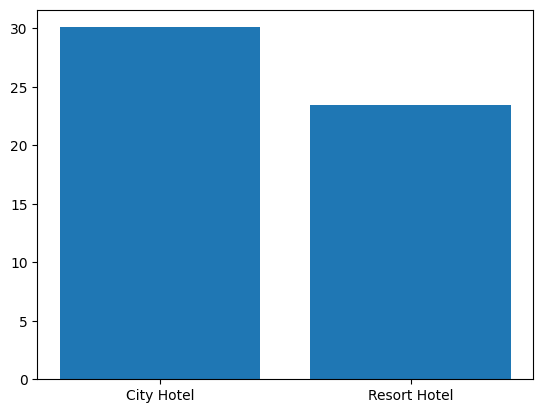

In [150]:
plt.bar(D3.index,D3.cancel_perc)

Q10)  Which hotel has a  high chance that its customer will return for another stay?

In [151]:
repeated_guest = df1[df1.is_repeated_guest == 1]

repeated_guests = repeated_guest.groupby("hotel").count().is_repeated_guest

total_guests = df1.groupby("hotel").count().is_repeated_guest

perc_repetation = repeated_guests/total_guests * 100

D4 = pd.concat([repeated_guests,total_guests,perc_repetation], axis =1)

D4.columns = ["repeated_guests","total_guests", "perc_repetation"]

D4

,repeated_guests,total_guests,perc_repetation
hotel,,,
City Hotel,1657,53273,3.110394
Resort Hotel,1707,33956,5.027094


<BarContainer object of 2 artists>

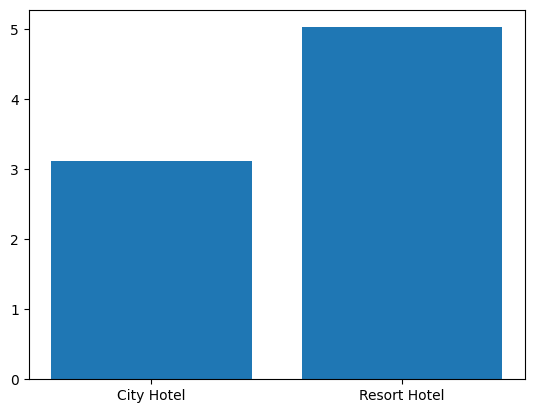

In [152]:
plt.bar(D4.index,D4.perc_repetation)

Q11)  Which channel is mostly used for the  early booking of hotels?

In [153]:
channel = df1.distribution_channel.value_counts()/len(df1) * 100
channel

distribution_channel
TA/TO        79.133086
Direct       14.850566
Corporate     5.803116
GDS           0.207500
Undefined     0.005732
Name: count, dtype: float64

<BarContainer object of 5 artists>

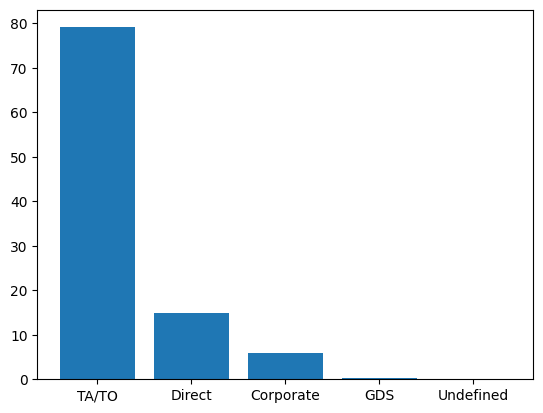

In [154]:
plt.bar(channel.index,channel)

Q12)  Which channel has a  longer average waiting time?

In [155]:
avg_wait_time = df1.groupby("distribution_channel").days_in_waiting_list.mean()
avg_wait_time

distribution_channel
Corporate    0.196168
Direct       0.368766
GDS          0.000000
TA/TO        0.859504
Undefined    0.000000
Name: days_in_waiting_list, dtype: float64

<BarContainer object of 5 artists>

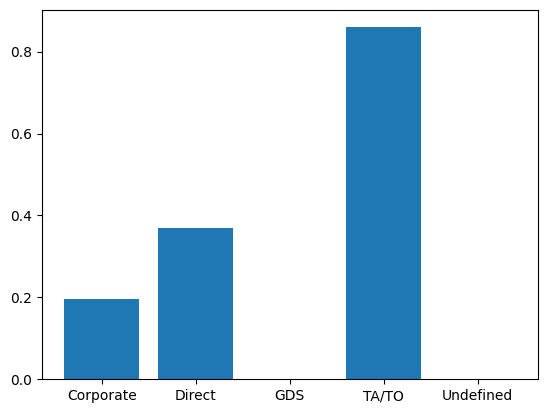

In [156]:
plt.bar(avg_wait_time.index,avg_wait_time)

Q13)  Which significant distribution channel has the highest cancellation percentage?

In [158]:
is_cancelled = df1[df1.is_canceled == 1]

num_cancellation = is_cancelled.groupby("distribution_channel").count().is_canceled

total_bookings = df1.groupby("distribution_channel").count().is_canceled

perc_cancellation = num_cancellation/total_bookings * 100

perc_cancellation



distribution_channel
Corporate    12.761754
Direct       14.844836
GDS          19.889503
TA/TO        31.000913
Undefined    80.000000
Name: is_canceled, dtype: float64

<BarContainer object of 5 artists>

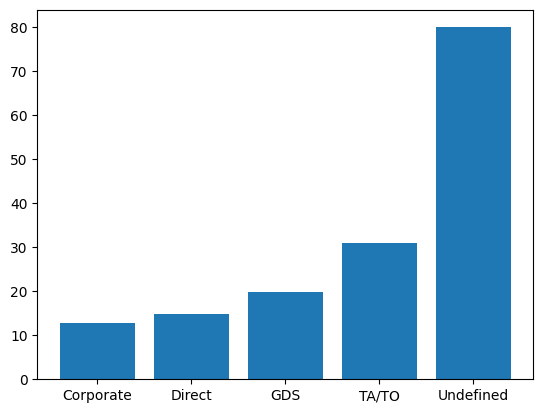

In [159]:
plt.bar(perc_cancellation.index,perc_cancellation)

Q14) Does a  longer waiting period or longer lead time causes the cancellation of bookings?

In [160]:
waiting_bookings = df1[df1['days_in_waiting_list'] !=0]

In [161]:
waiting_bookings

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,total_stay,total_people
2272,Resort Hotel,0,59,2015,October,41,8,0,3,2,...,0,50,Contract,45.0,0,0,Check-Out,2015-10-11,3,2
2486,Resort Hotel,0,47,2015,October,43,19,1,4,2,...,0,47,Transient-Party,76.8,0,0,Check-Out,2015-10-24,5,2
2508,Resort Hotel,0,47,2015,October,43,19,1,4,2,...,0,47,Transient-Party,76.8,0,0,Check-Out,2015-10-24,5,2
3106,Resort Hotel,0,105,2015,November,47,18,2,4,2,...,0,65,Transient-Party,69.0,0,0,Check-Out,2015-11-24,6,2
3118,Resort Hotel,0,105,2015,November,47,18,2,4,2,...,0,65,Transient-Party,71.0,0,0,Check-Out,2015-11-24,6,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
111978,City Hotel,0,345,2017,May,19,13,2,3,2,...,0,36,Transient-Party,89.1,0,0,Check-Out,2017-05-18,5,2
112021,City Hotel,0,34,2017,May,20,16,0,3,1,...,0,9,Transient-Party,130.0,0,0,Check-Out,2017-05-19,3,1
112822,City Hotel,0,344,2017,May,21,27,1,1,2,...,0,98,Transient-Party,128.0,0,1,Check-Out,2017-05-29,2,2
114733,City Hotel,0,322,2017,June,25,23,2,2,2,...,0,59,Transient-Party,105.0,0,3,Check-Out,2017-06-27,4,2


<Axes: xlabel='days_in_waiting_list', ylabel='Density'>

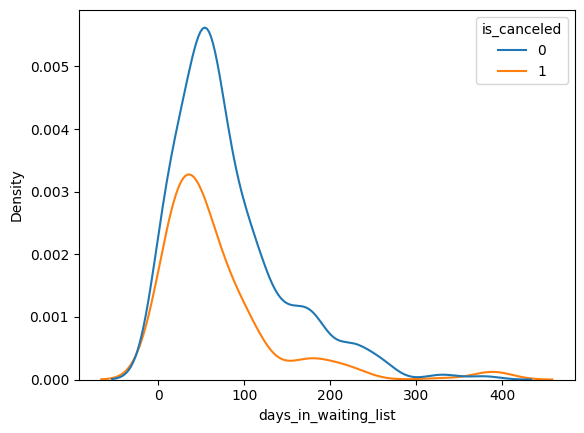

In [162]:
sns.kdeplot(x = "days_in_waiting_list",hue = "is_canceled", data =waiting_bookings)

<Axes: xlabel='lead_time', ylabel='Density'>

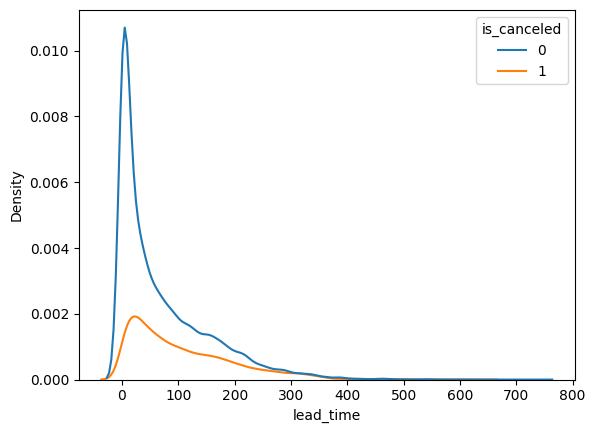

In [163]:
sns.kdeplot(x = "lead_time",hue = "is_canceled", data = df1)

We see that most of the bookings that are cancelled have waiting period of less 150 days but also most of bookings that are not cancelled also have waiting period less than 150 days. Hence this shows that waiting period has no effect on cancellation of bookings. \
\
Also, lead time has no affect on cancellation of bookings, as both curves of cancelation and not cncelation are similar for lead time too.

Q15) Whether not getting allotted the same room type as demand is the main cause of cancellation for bookings?

In [164]:
# rooms cancelled if reserved != assigned ---> True
# rooms cancelled if reserved = assigned -----> False

cancellations = df1[df1.is_canceled == 1]

count = 0
count1 = 0

cancellations["same_room_not_alloted"] = cancellations['reserved_room_type'] != cancellations['assigned_room_type']
    
cancellations["same_room_not_alloted"].value_counts()/len(cancellations) * 100



same_room_not_alloted
False    97.434189
True      2.565811
Name: count, dtype: float64

We see that not getting same room as demanded is not the case of cancellation of rooms. A significant percentage of bookings are not cancelled even after getting different room as demanded.

 Q16) Which types of customers mostly make bookings?

In [166]:
not_canceled  = df1[df1.is_canceled == 0]
not_canceled


,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,total_stay,total_people
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,0,0,Transient,0.00,0,0,Check-Out,2015-07-01,0,2
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,0,0,Transient,0.00,0,0,Check-Out,2015-07-01,0,2
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,0,0,Transient,75.00,0,0,Check-Out,2015-07-02,1,1
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,0,0,Transient,75.00,0,0,Check-Out,2015-07-02,1,1
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,0,0,Transient,98.00,0,1,Check-Out,2015-07-03,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,0,0,Transient,96.14,0,0,Check-Out,2017-09-06,7,2
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,0,0,Transient,225.43,0,2,Check-Out,2017-09-07,7,3
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,0,0,Transient,157.71,0,4,Check-Out,2017-09-07,7,2
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,0,0,Transient,104.40,0,0,Check-Out,2017-09-07,7,2


In [167]:
single   = not_canceled[(not_canceled['adults']==1) & (not_canceled['children']==0) & (not_canceled['babies']==0)]
couple   = not_canceled[(not_canceled['adults']==2) & (not_canceled['children']==0) & (not_canceled['babies']==0)]
family   = not_canceled[not_canceled['adults'] + not_canceled['children'] + not_canceled['babies'] > 2]

In [168]:
len(single)

12974

In [169]:
len(couple)

40624

In [170]:
len(family)

9286

Moslty bookings are done by couples(although we are not sure that they are couple as data doesn't tell about that)